# ENTREGABLE 1

INSTRUCCIONES

Realizar la primera fase del análisis exploratorio (limpieza) usando el archivo CSV (dataset_banco.csv) con 45215 filas y 17 columnas.

# 1. El problema del negocio

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

#2. El set de datos

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

#3. Una primera mirada al dataset

In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Lectura
from google.colab import drive
drive.mount('/gdrive')

ruta = "/gdrive/MyDrive/Entregable_MachineLearning/Clasificacion/dataset_banco.csv"
data = pd.read_csv(ruta)

Mounted at /gdrive


In [16]:
from google.colab import drive
drive.flush_and_unmount()  # Desmonta Google Drive
drive.mount('/content/drive')  # Vuelve a montar Google Drive

Mounted at /content/drive


In [67]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
print(data.shape)
data.head()

(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [25]:
# Veamos las variables categóricas y las numéricas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


#4. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

## 4.1 Datos faltantes

Comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.

El número total de registros debería ser 45.215. Sin embargo columnas como "job", "marital", "education", "balance", "duration" y "pdays".

Por ser tan pocos los datos  faltantes optaremos por eliminar las filas correspondientes:

In [27]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


##4.2 Columnas irrelevantes

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
- **Una columna categórica pero con un sólo nivel**. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".
- **Una columna numérica pero con un sólo valor**. Por ejemplo si en la columna "edad" todos los vlaores fuesen iguales a 50.
- **Columnas con información redundante**. Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.

Verifiquemos lo que ocurre con las columnas numéricas:

In [29]:
#Validacion columnas categoricas:

cols_cat=['job' , 'marital' , 'education' , 'default' , 'housing' , 'loan' , 'contact' , 'month' , 'poutcome' , 'y']

for col in cols_cat:
  print(f'columna {col}:{data[col].nunique()} subniveles')

columna job:18 subniveles
columna marital:6 subniveles
columna education:10 subniveles
columna default:2 subniveles
columna housing:2 subniveles
columna loan:6 subniveles
columna contact:5 subniveles
columna month:12 subniveles
columna poutcome:6 subniveles
columna y:2 subniveles


Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservaremos todas las columnas numéricas.

In [30]:
#validacion columnas numericas:

data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


##4.3 Filas repetidas

In [32]:
print(f'antes de la eliminacion de filas:{data.shape}')
data.drop_duplicates(inplace=True)
print(f'despues de la eliminacion de filas:{data.shape}')

antes de la eliminacion de filas:(45207, 17)
despues de la eliminacion de filas:(45203, 17)


##4.4 *Outliers* en las variables numéricas

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.


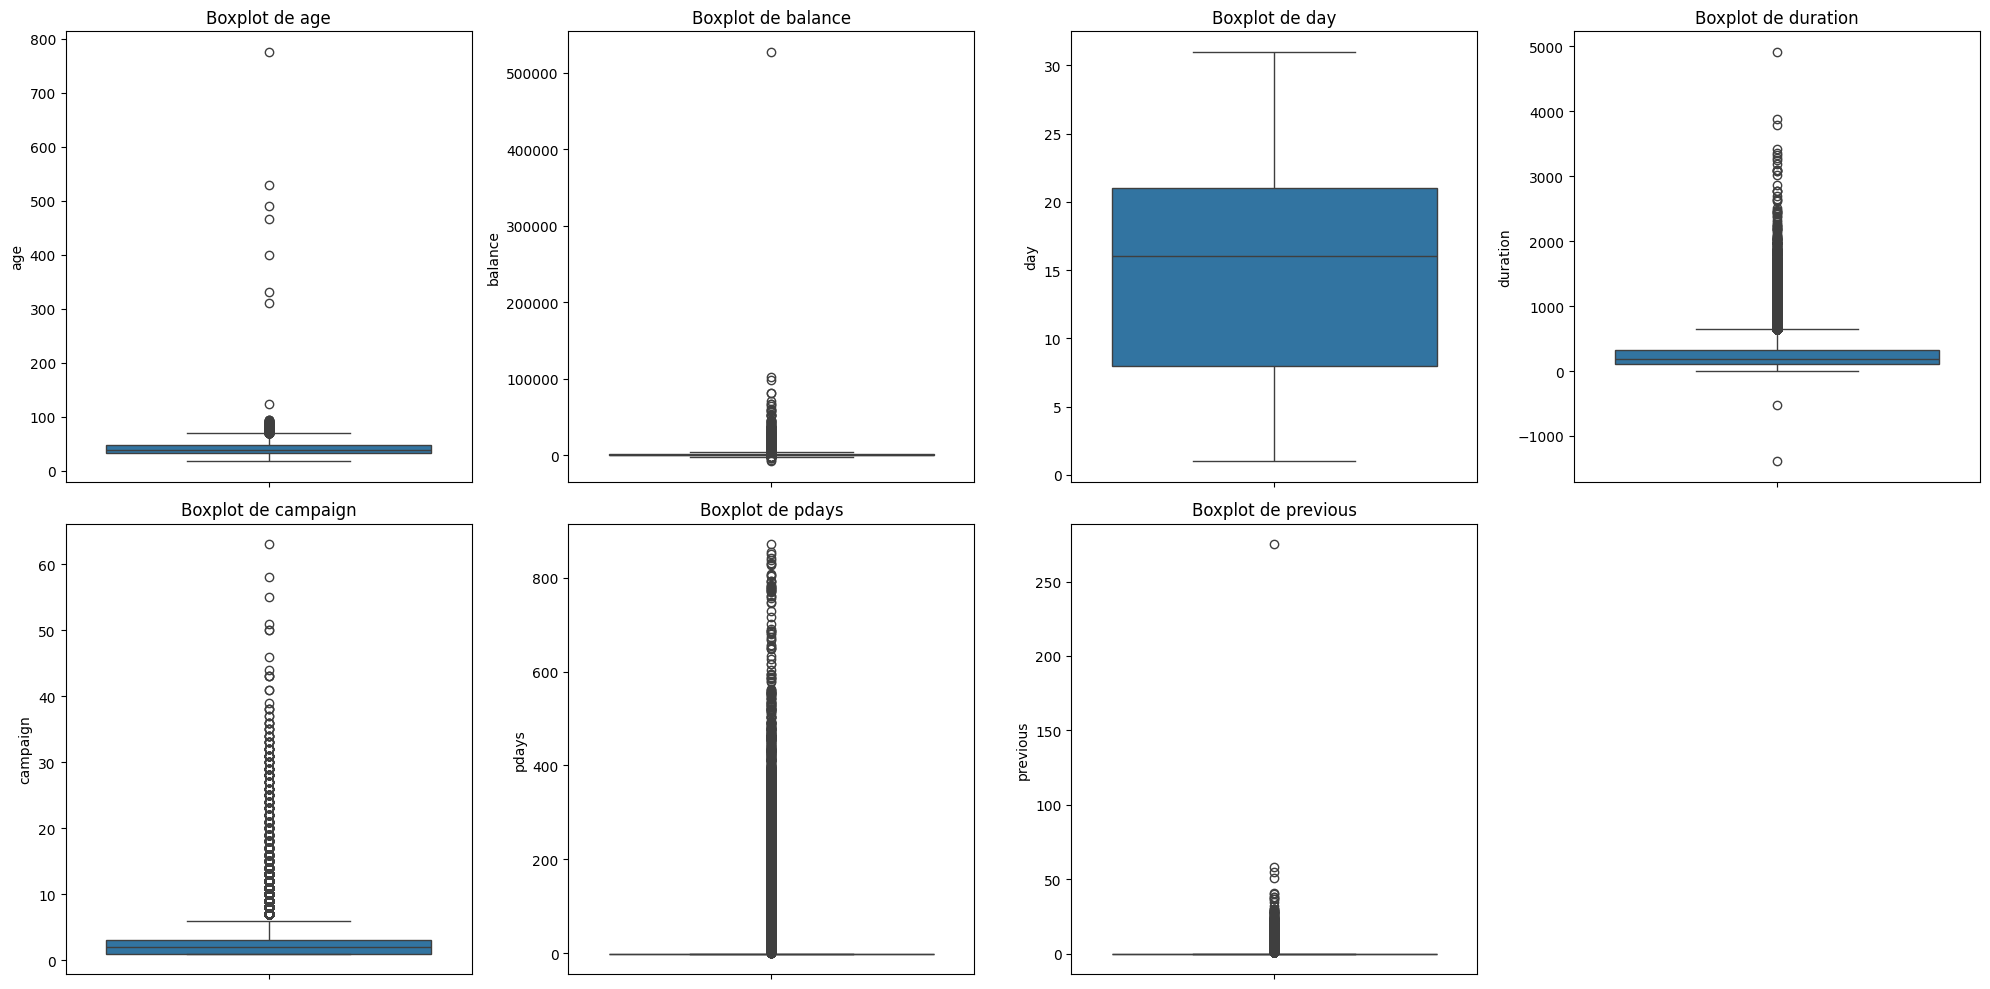

In [33]:
#Validacion Outliers en las variables numericas

cols_num=['age', 'balance' , 'day' , 'duration' , 'campaign' , 'pdays' , 'previous']

plt.figure(figsize=(20, 10))

for i, col in enumerate(cols_num):
    plt.subplot(2, 4, i + 1)  # Ajusta las dimensiones según necesites
    sns.boxplot(y=col, data=data)
    plt.title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()



Analisis Outliers:
Se observan edades ('age') por encima de los 100 años,
duracion ('duration') de llamadas en rango de tiempo negativas,
llamadas anteriores ('previous') tiene un valor atipico casi 300 veces de contacto, lo cual seguro se trata de un error.

In [34]:
#Se realiza limpieza de Outliers

#Eliminar edades por encima de 100 años:
print(f'tamaño del set antes de eliminar registros{data.shape}')
data = data[data['age']<=100]
print(f'tamaño del set despues de eliminar registros{data.shape}')

tamaño del set antes de eliminar registros(45203, 17)
tamaño del set despues de eliminar registros(45195, 17)


In [35]:
#Eliminar duracion llamadas con valores negativos:
print(f'tamaño del set antes de eliminar registros{data.shape}')
data = data[data['duration']>0]
print(f'tamaño del set despues de eliminar registros{data.shape}')

tamaño del set antes de eliminar registros(45195, 17)
tamaño del set despues de eliminar registros(45190, 17)


In [36]:
#Eliminar No de llamadas atipicos:
print(f'tamaño del set antes de eliminar registros{data.shape}')
data = data[data['previous']<100]
print(f'tamaño del set despues de eliminar registros{data.shape}')

tamaño del set antes de eliminar registros(45190, 17)
tamaño del set despues de eliminar registros(45189, 17)


##4.5 Errores tipográficos en variables categóricas

En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

Se deben unificar estos sub-niveles

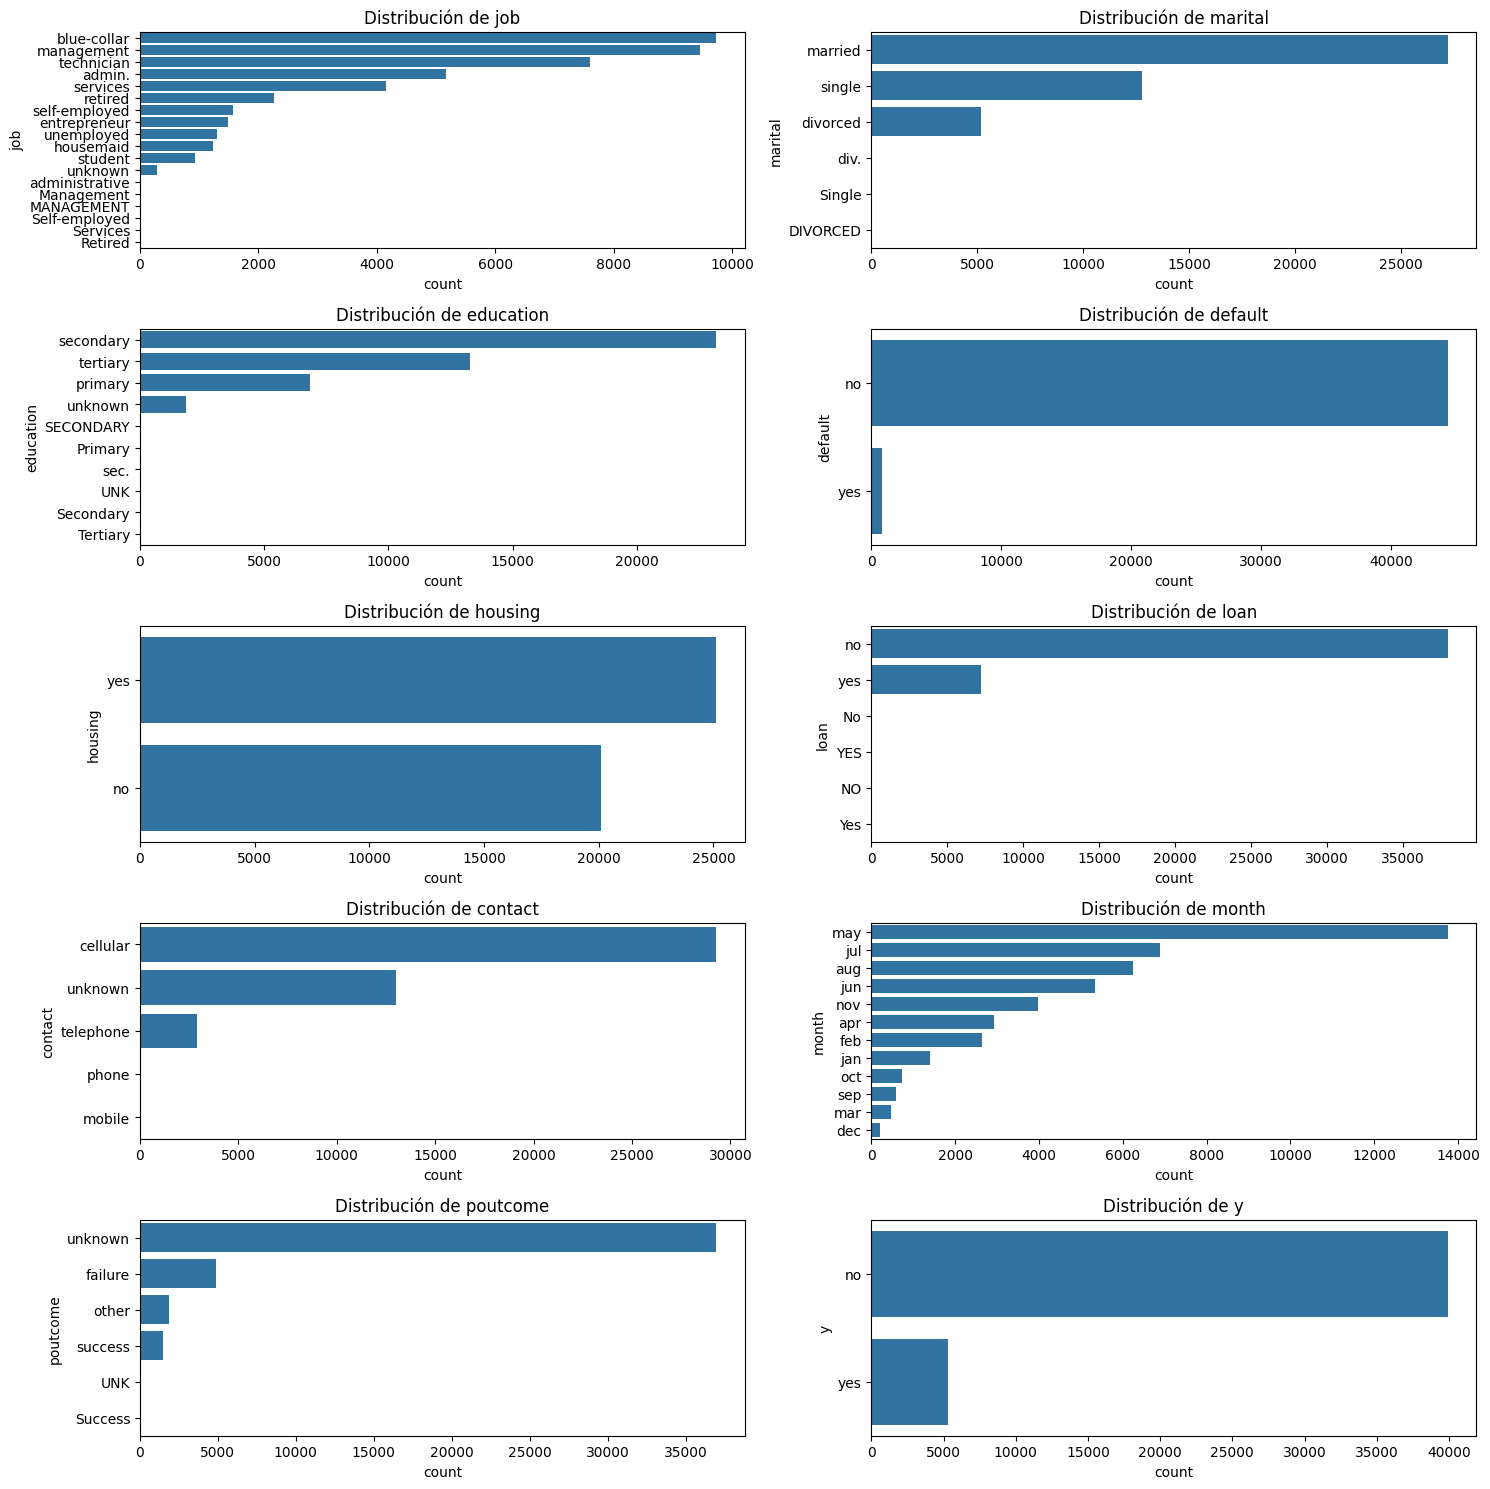

In [45]:
cols_cat=['job' , 'marital' , 'education' , 'default' , 'housing' , 'loan' , 'contact' , 'month' , 'poutcome' , 'y']
# Configura el tamaño de la figura para acomodar los subplots
plt.figure(figsize=(15, 15))

# Crea un gráfico de barras para cada variable categórica
for i, col in enumerate(cols_cat):
    plt.subplot(5, 2, i + 1)  # Ajusta las dimensiones según la cantidad de variables categóricas
    sns.countplot(y=col, data=data, order = data[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.tight_layout()

plt.show()

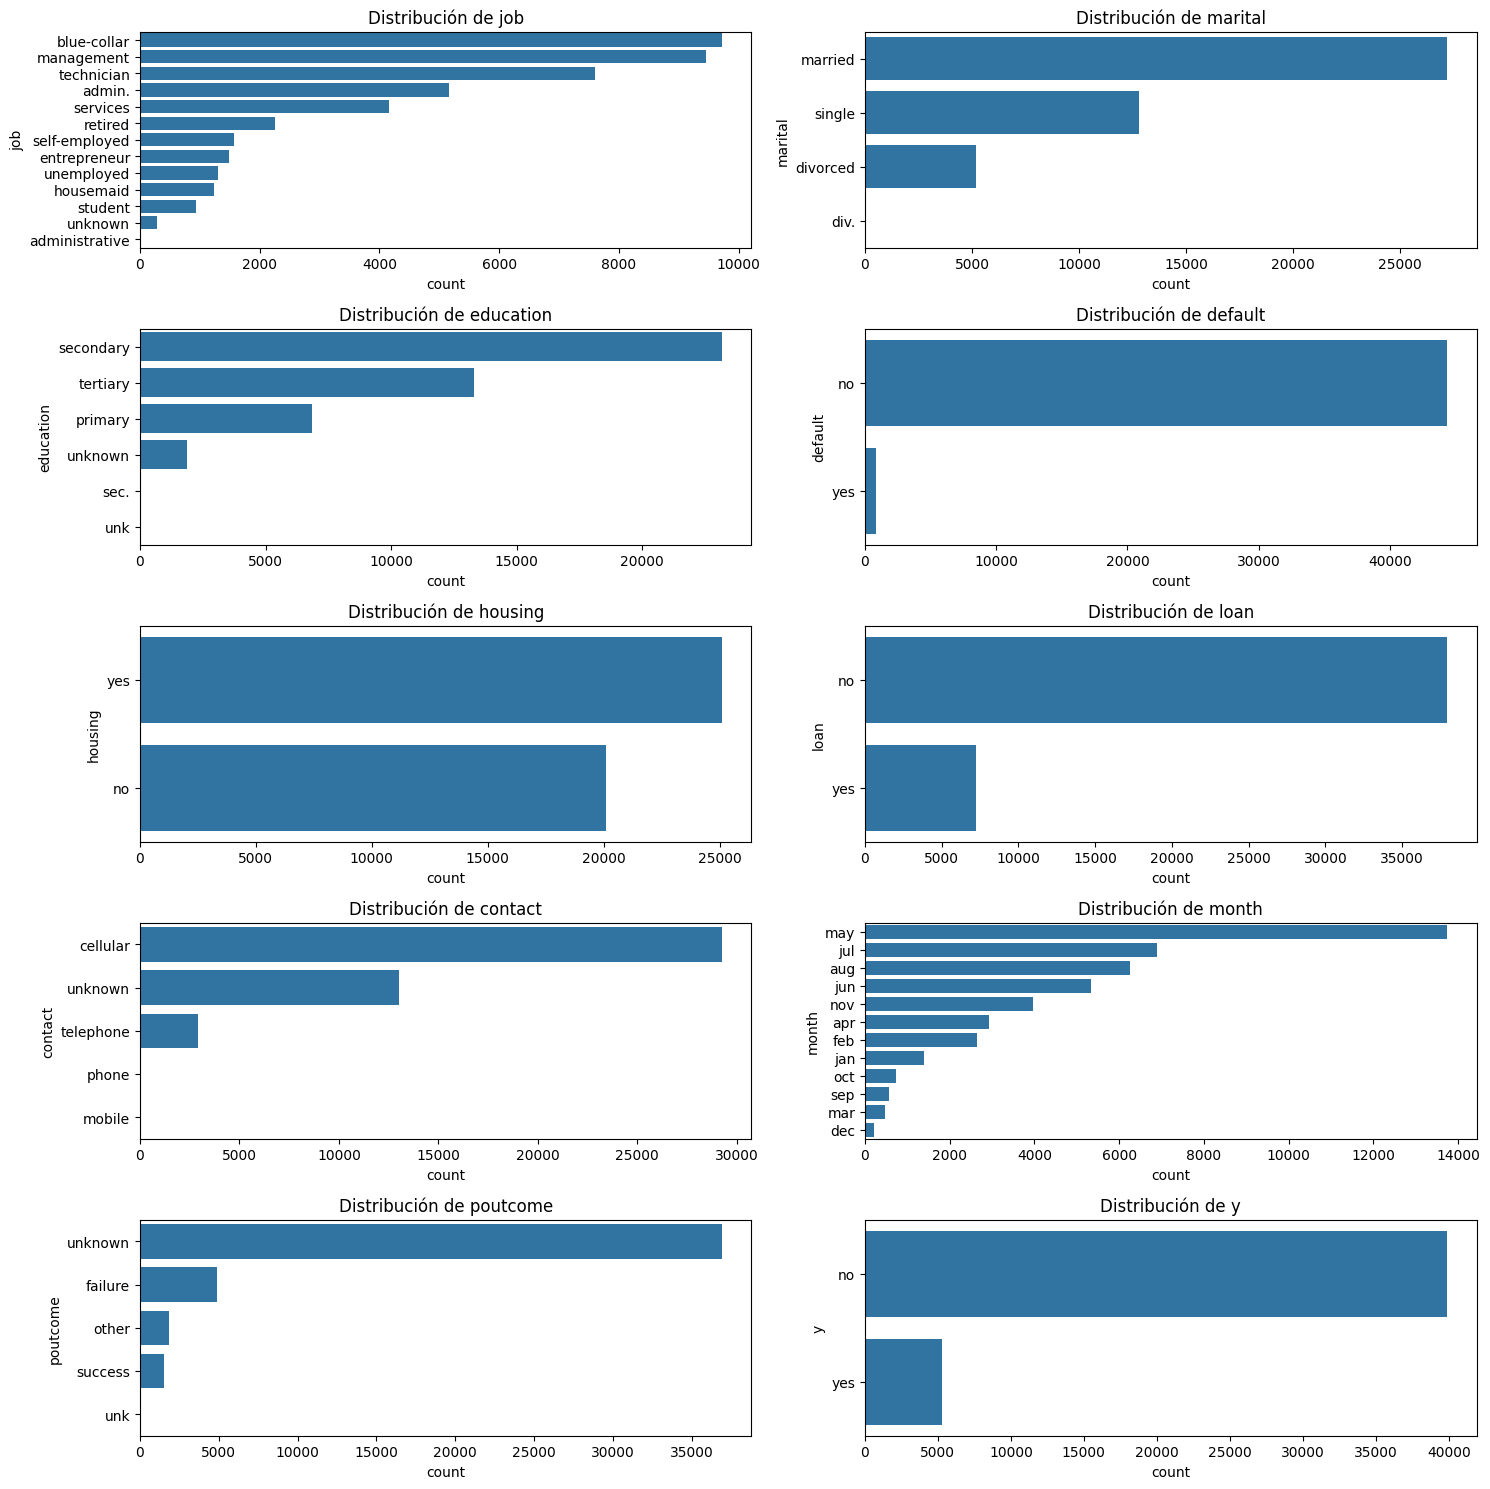

In [46]:
cols_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

# Asumiendo que 'data' es tu DataFrame
for col in cols_cat:
    data[col] = data[col].str.lower()


# Configura el tamaño de la figura para acomodar los subplots
plt.figure(figsize=(15, 15))

# Graficamos nuevamente:
for i, col in enumerate(cols_cat):
    plt.subplot(5, 2, i + 1)  # Ajusta las dimensiones según la cantidad de variables categóricas
    sns.countplot(y=col, data=data, order = data[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.tight_layout()

plt.show()

In [56]:
#unificar errores tipograficos:

print(data['job'].unique())
data['job']=data['job'].str.replace('admin.','administrative' , regex=False)
print(data['job'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']


In [60]:
print(data['marital'].unique())
data['marital']=data['marital'].str.replace('divorcedd','divorced',regex=False)
print(data['marital'].unique())

['married' 'single' 'divorced']
['married' 'single' 'divorced']


In [62]:
print(data['education'].unique())
data['education']=data['education'].str.replace('unknownnown','unknown',regex=False)
print(data['education'].unique())

['tertiary' 'secondary' 'unknownnown' 'primary' 'unknown']
['tertiary' 'secondary' 'unknown' 'primary']


In [63]:
print(data['contact'].unique())
data[data['contact']=='phone'] = 'telephone'
print(data['contact'].unique())

['unknown' 'cellular' 'telephone' 'phone' 'mobile']
['unknown' 'cellular' 'telephone' 'mobile']


In [65]:
print(data['poutcome'].unique())
data[data['poutcome']=='unk'] = 'unknown'
print(data['poutcome'].unique())

['unknown' 'failure' 'other' 'success' 'telephone']
['unknown' 'failure' 'other' 'success' 'telephone']


In [66]:
data.shape

(45189, 17)

## Conclusiones

Se ha realizado limpieza del dataset Banco en donde se abordaron elementos como:
1. Eliminacion datos faltantes.
2. Eliminacion (filas) repetidos
3. Eliminan valores extremos (outliers) en el caso de las variables numéricas.
4. Unificacion de errores tipograficos y minusculas.

Una vez realizado lo anterior se paso de un dataset de (45215,17) a (45189,17) el cual se encuentra listo para realzar el analisis exploratorio.

Por el momento no se eliminan columnas irrelevantes ya que en este primer acercamiento no se puede concluir esto.

In [68]:
ruta = '/content/drive/MyDrive/Entregable_MachineLearning/Clasificacion/andres_clean_dataset_banco.csv'
data.to_csv(ruta, index=False)